In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv(r"C:\Users\mages\Downloads\weatheraus\weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [36]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [37]:
df.shape

(145460, 23)

# Replacing the target from object to int 

In [38]:
df['RainToday'].replace({'Yes':1,'No':0},inplace=True)
df['RainTomorrow'].replace({'Yes':1,'No':0},inplace=True)

# Plotting Heatmap to find the correlation between the data

<AxesSubplot:>

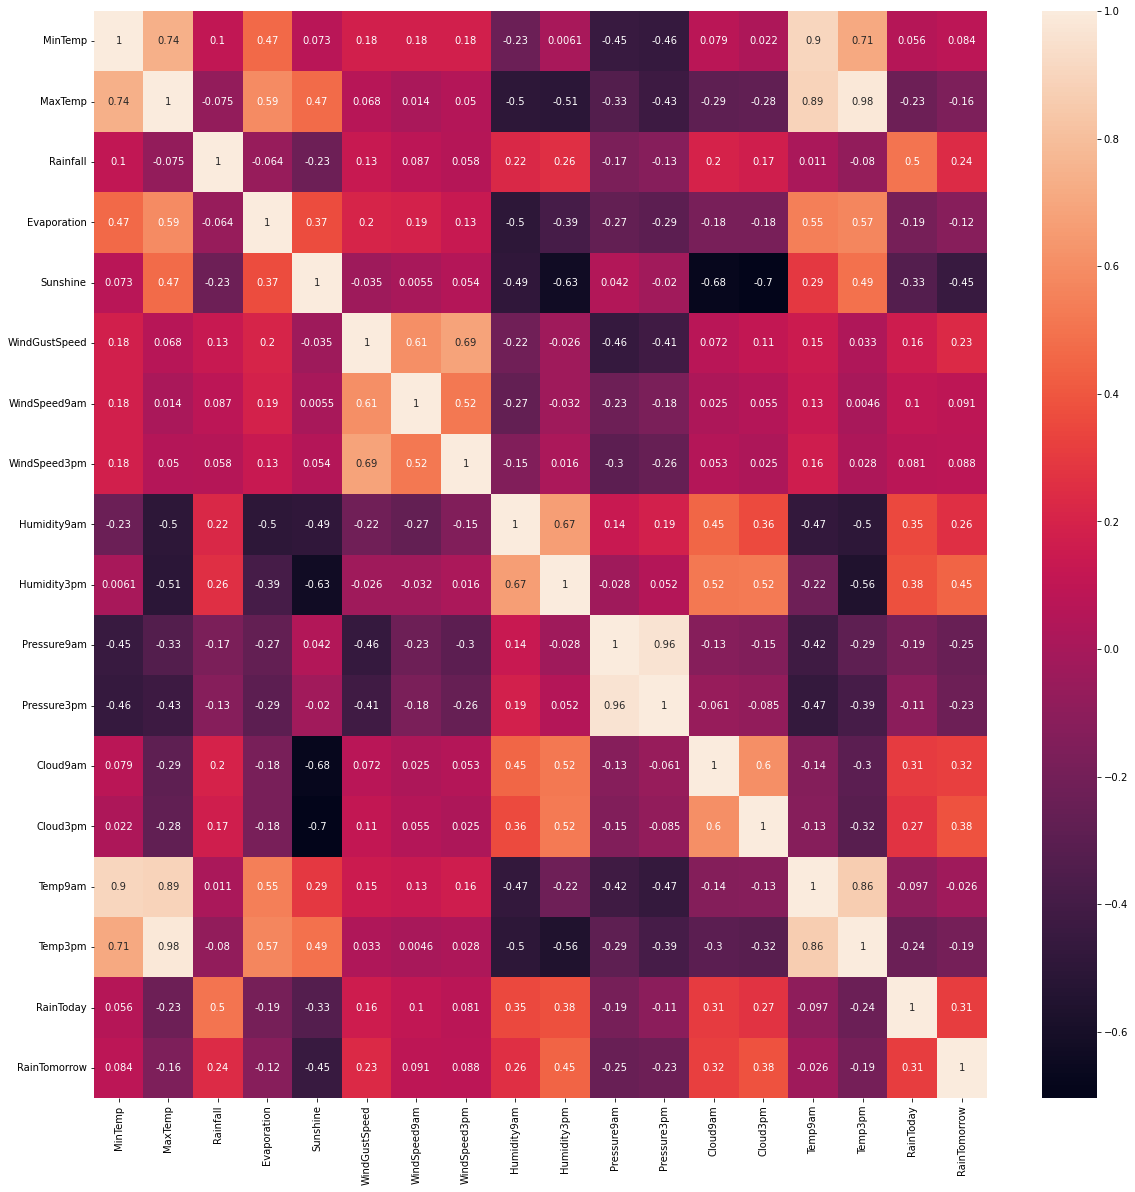

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

# Feature selection

In [40]:
important_num_cols = list(df.corr()["RainTomorrow"][(df.corr()["RainTomorrow"]>0.20) | 
                                                 (df.corr()["RainTomorrow"]<-0.20)].index)

In [41]:
important_num_cols

['Rainfall',
 'Sunshine',
 'WindGustSpeed',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'RainToday',
 'RainTomorrow']

In [42]:
df_num=df[important_num_cols]

In [43]:
obj=df.select_dtypes('object')

In [44]:
df=pd.concat([df_num,obj],axis=1)

# Treating null values 

In [45]:
df_nullcount=pd.DataFrame(df.isnull().sum(),columns=['Nullcount'])
df_nullpercentage=pd.DataFrame((df.isnull().sum())*100/len(df),columns=['Percentage'])
df_null=pd.concat([df_nullcount,df_nullpercentage],axis=1)

In [46]:
df_null.sort_values(['Percentage'],ascending=False)

,Nullcount,Percentage
Sunshine,69835,48.009762
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446
WindDir3pm,4228,2.906641


Removing the null values if its less than 5%

In [47]:
df.dropna(subset=['Humidity3pm','WindDir3pm','RainTomorrow','Rainfall','RainToday','WindDir9am','Humidity9am'
                  ,'WindGustDir','WindGustSpeed'],inplace=True)

In [48]:
df_nullcount=pd.DataFrame(df.isnull().sum(),columns=['Nullcount'])
df_nullpercentage=pd.DataFrame((df.isnull().sum())*100/len(df),columns=['Percentage'])
df_null=pd.concat([df_nullcount,df_nullpercentage],axis=1)
df_null.sort_values(['Percentage'],ascending=False)

,Nullcount,Percentage
Sunshine,55109,45.221351
Cloud3pm,46776,38.383457
Cloud9am,45430,37.278956
Pressure9am,8836,7.250646
Pressure3pm,8785,7.208797
Rainfall,0,0.000000
WindGustSpeed,0,0.000000
Humidity9am,0,0.000000
Humidity3pm,0,0.000000
RainToday,0,0.000000


In [49]:
df.drop(['Location'],inplace=True,axis=1)

In [50]:
df.describe()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
count,121865.000000,66756.000000,121865.000000,121865.000000,121865.000000,113029.00000,113080.000000,76435.000000,75089.000000,121865.000000,121865.000000
mean,2.356368,7.726592,40.687343,67.684306,50.798556,1017.42427,1015.049032,4.422856,4.493801,0.223764,0.220761
std,8.482396,3.776385,13.389708,19.058134,20.940680,7.03317,6.958036,2.876513,2.718086,0.416767,0.414761
min,0.000000,0.000000,7.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,31.000000,56.000000,36.000000,1012.80000,1010.300000,1.000000,2.000000,0.000000,0.000000
50%,0.000000,8.600000,39.000000,69.000000,51.000000,1017.40000,1015.000000,5.000000,5.000000,0.000000,0.000000
75%,0.800000,10.700000,48.000000,82.000000,65.000000,1022.10000,1019.700000,7.000000,7.000000,0.000000,0.000000
max,367.600000,14.500000,135.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,1.000000,1.000000


In [51]:
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df_nullcount=pd.DataFrame(df.isnull().sum(),columns=['Nullcount'])
df_nullpercentage=pd.DataFrame((df.isnull().sum())*100/len(df),columns=['Percentage'])
df_null=pd.concat([df_nullcount,df_nullpercentage],axis=1)
df_null.sort_values(['Percentage'],ascending=False)

,Nullcount,Percentage
Rainfall,0,0.0
Sunshine,0,0.0
WindGustSpeed,0,0.0
Humidity9am,0,0.0
Humidity3pm,0,0.0
Pressure9am,0,0.0
Pressure3pm,0,0.0
Cloud9am,0,0.0
Cloud3pm,0,0.0
RainToday,0,0.0


In [52]:
df.drop(['Date'],inplace=True,axis=1)
df.dtypes

Rainfall         float64
Sunshine         float64
WindGustSpeed    float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
RainToday        float64
RainTomorrow     float64
WindGustDir       object
WindDir9am        object
WindDir3pm        object
dtype: object